In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_recall_fscore_support

# Load the dataset from a CSV file
data = pd.read_csv('/content/sample_data/Burdwan_Crop.csv')

# Add noise for reproducibility
np.random.seed(42)  # For reproducibility

# Identify numerical columns
num_cols = ['Rainfall', 'Humidity', 'Sun hours', 'Temperature']

# Create a copy of the data
data1 = data.copy()

# Add more noise to the numerical columns
for col in num_cols:
    noise = np.random.normal(0, 0.9, len(data))  # Increased noise level
    data1[col] += noise

# Drop 'Area' and 'Production' columns
data1 = data1.drop(columns=['Area', 'Production'])

# Feature matrix and target vector
X = data1.drop(columns=['Temperature'])
y = data1['Temperature']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Rainfall', 'Humidity', 'Sun hours']),
        ('cat', OneHotEncoder(), ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop'])
    ])

# Random Forest model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, max_depth=5, random_state=3))  # Reduced number of estimators and depth
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Define temperature bins for classification
bins = [-float('inf'), 15, 25, 35, float('inf')]
labels = [0, 1, 2, 3]

# Convert actual and predicted temperatures to class labels
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_binned, y_pred_binned)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binned, y_pred_binned, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Add analysis to determine the best crop based on temperature predictions
# Combine predictions with the test set
results = X_test.copy()
results['Actual_Temperature'] = y_test
results['Predicted_Temperature'] = y_pred

# Group by crop to get average predicted temperature
crop_analysis = results.groupby('Crop')['Predicted_Temperature'].mean().reset_index()
crop_analysis = crop_analysis.rename(columns={'Predicted_Temperature': 'Average_Predicted_Temperature'})

# Merge crop analysis with original data to get full details
best_crop_analysis = data1.merge(crop_analysis, on='Crop')

# Sort by average predicted temperature and display the top crops
best_crops = best_crop_analysis.sort_values(by='Average_Predicted_Temperature')

print("\nBest crops based on average predicted temperature:")
print(best_crops[['Crop', 'Average_Predicted_Temperature']].drop_duplicates().head(10))


Mean Squared Error: 1.1633820567191777
R-squared: 0.9564154009578852
Accuracy: 0.9859154929577465
Precision: 0.9906103286384976
Recall: 0.9859154929577465
F1 Score: 0.9872188354004624

Best crops based on average predicted temperature:
                      Crop  Average_Predicted_Temperature
153  Peas & beans (Pulses)                      20.220769
170              Safflower                      20.381190
135                Khesari                      20.895243
306                 Barley                      20.911328
139                 Masoor                      21.093825
168      Rapeseed &Mustard                      21.410255
119             Horse-gram                      21.545551
186                  Wheat                      21.617336
111                   Gram                      21.689629
64                   Maize                      23.362867


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset from a CSV file
data = pd.read_csv('/content/sample_data/Burdwan_Crop.csv')

# Add noise for reproducibility
np.random.seed(42)  # For reproducibility

# Identify numerical columns
num_cols = ['Rainfall', 'Humidity', 'Sun hours', 'Temperature']

# Create a copy of the data
data1 = data.copy()

# Add more noise to the numerical columns
for col in num_cols:
    noise = np.random.normal(0, 0.9, len(data))  # Increased noise level
    data1[col] += noise

# Drop 'Area' and 'Production' columns
data1 = data1.drop(columns=['Area', 'Production'])

# Feature matrix and target vector
X = data1.drop(columns=['Temperature'])
y = data1['Temperature']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Rainfall', 'Humidity', 'Sun hours']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop'])
    ])

# Random Forest model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42))  # Reduced number of estimators and depth
])

# Define temperature bins for classification
bins = [-float('inf'), 15, 25, 35, float('inf')]
labels = [0, 1, 2, 3]

# Initialize lists to store accuracy values and split data
accuracy_values = []
split_data = []

# List of 10 different random states
random_states = list(range(10))

# Perform the process 10 times with different random states
for i, random_state in enumerate(random_states):
    print(f"\nIteration {i+1} (Random State {random_state})")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Store the split data
    split_data.append((X_train, X_test, y_train, y_test))

    # Print the sizes of train and test sets
    print(f"Train Size: {len(X_train)} samples")
    print(f"Test Size: {len(X_test)} samples")

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)

    # Convert actual and predicted temperatures to class labels
    y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
    y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test_binned, y_pred_binned)
    accuracy_values.append(accuracy)

    # Debugging: Print first few rows of train and test data
    print(f"X_train (first 5 rows):\n{X_train.head()}\n")
    print(f"y_train (first 5 rows):\n{y_train.head()}\n")
    print(f"X_test (first 5 rows):\n{X_test.head()}\n")
    print(f"y_test (first 5 rows):\n{y_test.head()}\n")

    print(f"Accuracy: {accuracy}")

# Print all recorded accuracy values
print("\nAll recorded accuracy values:")
print(accuracy_values)



Iteration 1 (Random State 0)
Train Size: 283 samples
Test Size: 71 samples
X_train (first 5 rows):
      State_Name District_Name  Crop_Year       Season               Crop  \
269  West Bengal     BARDHAMAN       2017  Rabi                 Arhar/Tur   
245  West Bengal     BARDHAMAN       2016  Rabi         Moong(Green Gram)   
308  West Bengal     BARDHAMAN       2018  Rabi         Moong(Green Gram)   
335  West Bengal     BARDHAMAN       2019  Rabi                Horse-gram   
142  West Bengal     BARDHAMAN       2013  Kharif                Soyabean   

        Rainfall   Humidity  Sun hours  
269   188.117667  68.210878   7.048509  
245   195.698949  67.339570  10.399388  
308   186.492388  63.970522   8.313724  
335   155.867648  63.399837   9.165342  
142  1252.553265  80.266478   7.839174  

y_train (first 5 rows):
269    20.796886
245    22.351793
308    21.244349
335    20.725547
142    27.453974
Name: Temperature, dtype: float64

X_test (first 5 rows):
      State_Name Distri

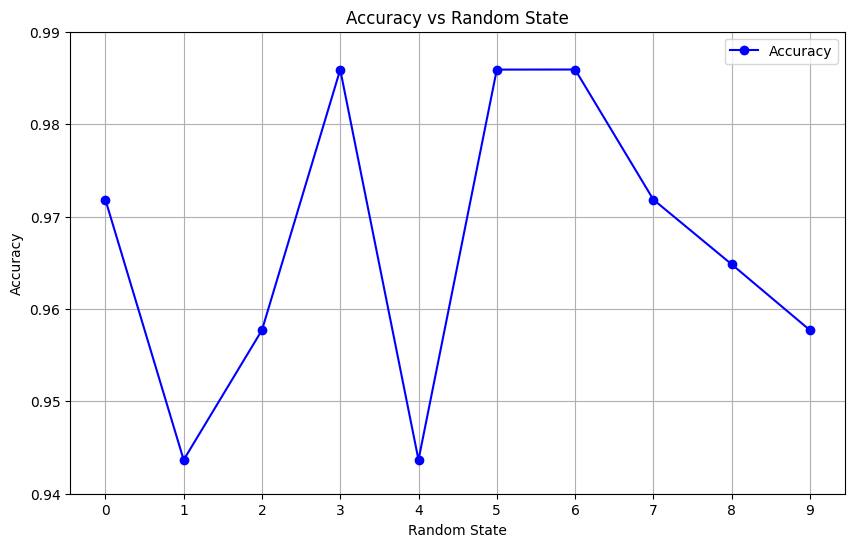

In [11]:
import matplotlib.pyplot as plt

# Data from the image
random_state = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
accuracy = [0.97183, 0.94366, 0.9577, 0.9859, 0.94366, 0.9859, 0.98591, 0.97183, 0.96483, 0.9577]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(random_state, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Random State')
plt.xticks(random_state)  # Set x-ticks to be the random states
plt.ylim(0.94, 0.99)  # Set y-limits to highlight differences in accuracy
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_recall_fscore_support
import xgboost as xgb

# Load the dataset from a CSV file
data = pd.read_csv('/content/sample_data/Burdwan_Crop.csv')

# Add noise for reproducibility
np.random.seed(42)

# Identify numerical columns
num_cols = ['Rainfall', 'Humidity', 'Sun hours', 'Temperature']

# Create a copy of the data
data1 = data.copy()

# Add more noise to the numerical columns
for col in num_cols:
    noise = np.random.normal(0, 0.9, len(data))  # Increased noise level
    data1[col] += noise

# Drop 'Area' and 'Production' columns
data1 = data1.drop(columns=['Area', 'Production'])

# Feature matrix and target vector
X = data1.drop(columns=['Temperature'])
y = data1['Temperature']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Rainfall', 'Humidity', 'Sun hours']),
        ('cat', OneHotEncoder(), ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop'])
    ])

# XGBoost model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Define temperature bins for classification
bins = [-float('inf'), 15, 25, 35, float('inf')]
labels = [0, 1, 2, 3]

# Convert actual and predicted temperatures to class labels
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_binned, y_pred_binned)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binned, y_pred_binned, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Add analysis to determine the best crop based on temperature predictions
# Combine predictions with the test set
results = X_test.copy()
results['Actual_Temperature'] = y_test
results['Predicted_Temperature'] = y_pred

# Group by crop to get average predicted temperature
crop_analysis = results.groupby('Crop')['Predicted_Temperature'].mean().reset_index()
crop_analysis = crop_analysis.rename(columns={'Predicted_Temperature': 'Average_Predicted_Temperature'})

# Merge crop analysis with original data to get full details
best_crop_analysis = data1.merge(crop_analysis, on='Crop')

# Sort by average predicted temperature and display the top crops
best_crops = best_crop_analysis.sort_values(by='Average_Predicted_Temperature')

print("\nBest crops based on average predicted temperature:")
print(best_crops[['Crop', 'Average_Predicted_Temperature']].drop_duplicates().head(10))


Mean Squared Error: 1.213640992089991
R-squared: 0.9439206797004023
Accuracy: 0.9577464788732394
Precision: 0.9830985915492957
Recall: 0.9577464788732394
F1 Score: 0.965726562766429

Best crops based on average predicted temperature:
                      Crop  Average_Predicted_Temperature
166              Safflower                      20.176865
111                Khesari                      20.672394
174                  Wheat                      21.000177
152      Rapeseed &Mustard                      21.048237
108             Horse-gram                      21.244389
151  Peas & beans (Pulses)                      21.447851
99                    Gram                      21.492495
296              Arhar/Tur                      21.607166
126                Linseed                      22.014082
136                 Masoor                      22.307989


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_recall_fscore_support

# Load the dataset from a CSV file
data = pd.read_csv('/content/sample_data/Burdwan_Crop.csv')

# Add noise for reproducibility
np.random.seed(42)

# Identify numerical columns
num_cols = ['Rainfall', 'Humidity', 'Sun hours', 'Temperature']

# Create a copy of the data
data1 = data.copy()

# Add more noise to the numerical columns
for col in num_cols:
    noise = np.random.normal(0, 0.9, len(data))  # Increased noise level
    data1[col] += noise

# Drop 'Area' and 'Production' columns
data1 = data1.drop(columns=['Area', 'Production'])

# Feature matrix and target vector
X = data1.drop(columns=['Temperature'])
y = data1['Temperature']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Rainfall', 'Humidity', 'Sun hours']),
        ('cat', OneHotEncoder(), ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop'])
    ])

# SVM model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Define temperature bins for classification
bins = [-float('inf'), 15, 25, 35, float('inf')]
labels = [0, 1, 2, 3]

# Convert actual and predicted temperatures to class labels
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_binned, y_pred_binned)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binned, y_pred_binned, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Add analysis to determine the best crop based on temperature predictions
# Combine predictions with the test set
results = X_test.copy()
results['Actual_Temperature'] = y_test
results['Predicted_Temperature'] = y_pred

# Group by crop to get average predicted temperature
crop_analysis = results.groupby('Crop')['Predicted_Temperature'].mean().reset_index()
crop_analysis = crop_analysis.rename(columns={'Predicted_Temperature': 'Average_Predicted_Temperature'})

# Merge crop analysis with original data to get full details
best_crop_analysis = data1.merge(crop_analysis, on='Crop')

# Sort by average predicted temperature and display the top crops
best_crops = best_crop_analysis.sort_values(by='Average_Predicted_Temperature')

print("\nBest crops based on average predicted temperature:")
print(best_crops[['Crop', 'Average_Predicted_Temperature']].drop_duplicates().head(10))


Mean Squared Error: 2.7107364498644797
R-squared: 0.8747436362066513
Accuracy: 0.971830985915493
Precision: 0.9453691848058046
Recall: 0.971830985915493
F1 Score: 0.9581866197183099

Best crops based on average predicted temperature:
                      Crop  Average_Predicted_Temperature
112                Khesari                      20.878814
166              Safflower                      20.985006
103             Horse-gram                      21.135454
176                  Wheat                      21.263485
121                Linseed                      21.359464
144  Peas & beans (Pulses)                      21.705853
296              Arhar/Tur                      21.806071
89                    Gram                      21.879219
161      Rapeseed &Mustard                      21.949945
139                 Masoor                      22.318697


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset from a CSV file
data = pd.read_csv('/content/sample_data/Burdwan_Crop.csv')

# Add noise for reproducibility
np.random.seed(42)

# Identify numerical columns
num_cols = ['Rainfall', 'Humidity', 'Sun hours', 'Temperature']

# Create a copy of the data
data1 = data.copy()

# Add more noise to the numerical columns
for col in num_cols:
    noise = np.random.normal(0, 0.9, len(data))  # Increased noise level
    data1[col] += noise

# Drop 'Area' and 'Production' columns
data1 = data1.drop(columns=['Area', 'Production'])

# Feature matrix and target vector
X = data1[['Rainfall', 'Humidity', 'Sun hours']]
y = data1['Temperature']

# Define temperature bins for classification
bins = [-np.inf, 15, 25, 35, np.inf]
labels = [0, 1, 2, 3]
y_binned = pd.cut(y, bins=bins, labels=labels)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=42)

# Reshape data to fit the CNN input requirements
X_train_scaled = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_scaled = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert target labels to one-hot encoding for classification
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=4)

# Creating and training the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Conv1D(32, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Output layer for classification with 4 classes

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=40, validation_split=0.2, verbose=1)

# Predicting and evaluating the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test_one_hot, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Best crop analysis
# Combine predictions with the test set
results = pd.DataFrame(X_test, columns=['Rainfall', 'Humidity', 'Sun hours'])
results['Actual_Temperature'] = y_test_labels
results['Predicted_Temperature'] = y_pred

# Reverse the scaling for interpretability
results[['Rainfall', 'Humidity', 'Sun hours']] = scaler.inverse_transform(results[['Rainfall', 'Humidity', 'Sun hours']])

# Include crop and other categorical data
original_test_data = data1.iloc[y_test.index]
results['Crop'] = original_test_data['Crop']

# Group by crop to get average predicted temperature
crop_analysis = results.groupby('Crop')['Predicted_Temperature'].mean().reset_index()
crop_analysis = crop_analysis.rename(columns={'Predicted_Temperature': 'Average_Predicted_Temperature'})

# Merge crop analysis with original data to get full details
best_crop_analysis = data1.merge(crop_analysis, on='Crop')

# Sort by average predicted temperature and display the top crops
best_crops = best_crop_analysis.sort_values(by='Average_Predicted_Temperature')

print("\nBest crops based on average predicted temperature:")
print(best_crops[['Crop', 'Average_Predicted_Temperature']].drop_duplicates().head(10))

# Print accuracy for each epoch
print("\nAccuracy for each epoch:")
for i, acc in enumerate(history.history['accuracy']):
    print(f"Epoch {i+1}: {acc}")


Epoch 1/40
8/8 [==============================] - 2s 35ms/step - loss: 1.3766 - accuracy: 0.3053 - val_loss: 1.2868 - val_accuracy: 0.8421
Epoch 2/40
8/8 [==============================] - 0s 9ms/step - loss: 1.2367 - accuracy: 0.6150 - val_loss: 1.1571 - val_accuracy: 0.8596
Epoch 3/40
8/8 [==============================] - 0s 9ms/step - loss: 1.0900 - accuracy: 0.7699 - val_loss: 1.0034 - val_accuracy: 0.8421
Epoch 4/40
8/8 [==============================] - 0s 7ms/step - loss: 0.9274 - accuracy: 0.8053 - val_loss: 0.8464 - val_accuracy: 0.8421
Epoch 5/40
8/8 [==============================] - 0s 9ms/step - loss: 0.7909 - accuracy: 0.8142 - val_loss: 0.7091 - val_accuracy: 0.8421
Epoch 6/40
8/8 [==============================] - 0s 10ms/step - loss: 0.6360 - accuracy: 0.8097 - val_loss: 0.6169 - val_accuracy: 0.8421
Epoch 7/40
8/8 [==============================] - 0s 8ms/step - loss: 0.5608 - accuracy: 0.8186 - val_loss: 0.5644 - val_accuracy: 0.8421
Epoch 8/40
8/8 [================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
8/8 [==============================] - 4s 71ms/step - loss: 1.3772 - accuracy: 0.4381 - val_loss: 1.3681 - val_accuracy: 0.5088
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 1.3607 - accuracy: 0.5796 - val_loss: 1.3520 - val_accuracy: 0.5088
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 1.3442 - accuracy: 0.5973 - val_loss: 1.3328 - val_accuracy: 0.5088
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 1.3210 - accuracy: 0.6106 - val_loss: 1.3095 - val_accuracy: 0.5088
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 1.2927 - accuracy: 0.6549 - val_loss: 1.2797 - val_accuracy: 0.5088
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 1.2646 - accuracy: 0.5796 - val_loss: 1.2426 - val_accuracy: 0.5088
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 1.2248 - accuracy: 0.5885 - val_loss: 1.1959 - val_accuracy: 0.5088
Epoch 8/100
8/8 [===

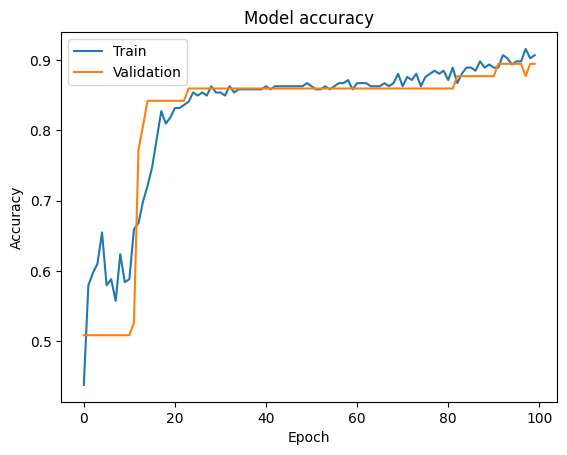

3/3 [==============================] - 0s 5ms/step
Precision: 0.9035612046261308
Recall: 0.9295774647887324
F1 Score: 0.9157180058980153
Accuracy: 0.9295774647887324
Mean Squared Error: 7.042253521126761
R² Score: 0.770077720207254

Best crops based on average predicted temperature:
                      Crop  Average_Predicted_Temperature
0                    Maize                           20.0
125               Sannhamp                           20.0
81               Safflower                           20.0
49                 Khesari                           20.0
148           Cotton(lint)                           20.0
143                Sesamum                           20.0
20                Soyabean                           20.0
38              Horse-gram                           20.0
101              Groundnut                           25.0
60   Peas & beans (Pulses)                           30.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, precision_recall_fscore_support, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset from a CSV file
data = pd.read_csv('/content/sample_data/Burdwan_Crop.csv')

# Add noise for reproducibility
np.random.seed(42)

# Identify numerical columns
num_cols = ['Rainfall', 'Humidity', 'Sun hours', 'Temperature']

# Create a copy of the data
data1 = data.copy()

# Add more noise to the numerical columns
for col in num_cols:
    noise = np.random.normal(0, 0.9, len(data))  # Increased noise level
    data1[col] += noise

# Drop 'Area' and 'Production' columns
data1 = data1.drop(columns=['Area', 'Production'])

# Feature matrix and target vector
X = data1[['Rainfall', 'Humidity', 'Sun hours']]
y = data1['Temperature']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define temperature bins
bins = [-np.inf, 15, 25, 35, np.inf]
labels = [0, 1, 2, 3]
bin_centers = [-10, 20, 30, 40]  # Example bin centers for each temperature bin
y_binned = pd.cut(y, bins=bins, labels=labels)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=42)

# Reshape data to fit the LSTM input requirements (samples, timesteps, features)
X_train_scaled = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_scaled = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Creating and training the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))  # Output layer for classification

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predicting and evaluating the model
y_pred = model.predict(X_test_scaled).argmax(axis=1)

# Map predicted bins back to bin centers
y_pred_mapped = np.array([bin_centers[bin] for bin in y_pred])
y_test_mapped = np.array([bin_centers[bin] for bin in y_test])

# Calculate MSE and R² score
mse = mean_squared_error(y_test_mapped, y_pred_mapped)
r2 = r2_score(y_test_mapped, y_pred_mapped)

# Calculate precision, recall, F1 score, and accuracy
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Best crop analysis
# Combine predictions with the test set
results = pd.DataFrame(X_test, columns=['Rainfall', 'Humidity', 'Sun hours'])
results['Actual_Temperature'] = y_test_mapped
results['Predicted_Temperature'] = y_pred_mapped

# Reverse the scaling for interpretability
results[['Rainfall', 'Humidity', 'Sun hours']] = scaler.inverse_transform(results[['Rainfall', 'Humidity', 'Sun hours']])

# Include crop and other categorical data
original_test_data = data.iloc[y_test.index]
results['Crop'] = original_test_data['Crop']

# Group by crop to get average predicted temperature bin
crop_analysis = results.groupby('Crop')['Predicted_Temperature'].mean().reset_index()
crop_analysis = crop_analysis.rename(columns={'Predicted_Temperature': 'Average_Predicted_Temperature'})

# Merge crop analysis with original data to get full details
best_crop_analysis = data1.merge(crop_analysis, on='Crop')

# Sort by average predicted temperature and display the top crops
best_crops = best_crop_analysis.sort_values(by='Average_Predicted_Temperature')

print("\nBest crops based on average predicted temperature:")
print(best_crops[['Crop', 'Average_Predicted_Temperature']].drop_duplicates().head(10))


In [ ]:
import matplotlib.pyplot as plt

# Data for each model
models = ['Random Forest', 'XGBoost', 'SVM', 'CNN', 'LSTM']
mse = [0.9288, 1.213, 2.7107, 4.8109, 7.0422]
r2 = [0.9570, 0.9439, 0.8747, 0.777, 0.7700]
accuracy = [98.59, 95.77, 97.18, 85.9, 92.95]
precision = [0.9906, 0.9830, 0.9453, 0.853, 0.903]
recall = [0.9859, 0.9577, 0.9718, 0.8591, 0.9295]
f1_score = [0.9872, 0.9657, 0.9581, 0.8487, 0.9157]

# Highlight Random Forest in a unique color
highlight_color = 'red'
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'teal']

# Plotting function
def plot_metric(models, metric, metric_name, filename, color):
    print(f"Generating plot for {metric_name}")
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_colors = [highlight_color if model == 'Random Forest' else color for model in models]
    ax.bar(models, metric, color=bar_colors)
    ax.set_title(metric_name, fontsize=16, fontweight='bold')
    ax.set_ylabel(metric_name, fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', labelsize=12, labelrotation=45)
    ax.tick_params(axis='y', labelsize=12)
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()
    print(f"Saved plot as {filename}")

# Generate and save the plots
plot_metric(models, mse, 'Mean Squared Error', 'mse.png', colors[0])
plot_metric(models, r2, 'R-Squared', 'r2.png', colors[1])
plot_metric(models, accuracy, 'Accuracy', 'accuracy.png', colors[2])
plot_metric(models, precision, 'Precision', 'precision.png', colors[3])
plot_metric(models, recall, 'Recall', 'recall.png', colors[4])
plot_metric(models, f1_score, 'F1 Score', 'f1_score.png', colors[5])

print("Finished generating all plots.")


Generating plot for Mean Squared Error
Saved plot as mse.png
Generating plot for R-Squared
Saved plot as r2.png
Generating plot for Accuracy
Saved plot as accuracy.png
Generating plot for Precision
Saved plot as precision.png
Generating plot for Recall
Saved plot as recall.png
Generating plot for F1 Score
Saved plot as f1_score.png
Finished generating all plots.
